<a href="https://colab.research.google.com/github/DensMathew/DensMathew/blob/main/Credit%20Card%20Client%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def load_and_preprocess_data(file_path='/content/german_credit_data.csv'):
    df = pd.read_csv(file_path)
    df = df.replace('nan', np.nan)
    return df

In [15]:
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [16]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [17]:
# Function to plot the ROC Curve
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], 'r--', lw=2)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [18]:
def train_evaluvate_model(x, y):
    le = LabelEncoder()
    categorical_columns = x.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        x[col] = le.fit_transform(x[col])
    y = le.fit_transform(y)

    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Create and train the model
    model = create_model(x_train_scaled.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")

    # Get predicted probabilities and predictions
    y_pred_prob = model.predict(x_test_scaled).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_prob)

    return model, history, scaler

In [19]:
def plot_training_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('Model Accuracy')
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation'])

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('Model Loss')
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  plt.tight_layout()
  plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4940 - loss: 0.7109 - val_accuracy: 0.6938 - val_loss: 0.6450
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 0.6412 - val_accuracy: 0.6938 - val_loss: 0.6084
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7163 - loss: 0.5957 - val_accuracy: 0.6938 - val_loss: 0.5811
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7000 - loss: 0.5773 - val_accuracy: 0.6938 - val_loss: 0.5557
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6840 - loss: 0.5864 - val_accuracy: 0.7063 - val_loss: 0.5349
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.5461 - val_accuracy: 0.7250 - val_loss: 0.5212
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.5496 - val_accuracy: 0.7188 - val_loss: 0.5171
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7391 - loss: 0.5065 - val_accuracy: 0.7500 - val_loss: 0.


Test Accuracy: 0.7450
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        59
           1       0.77      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



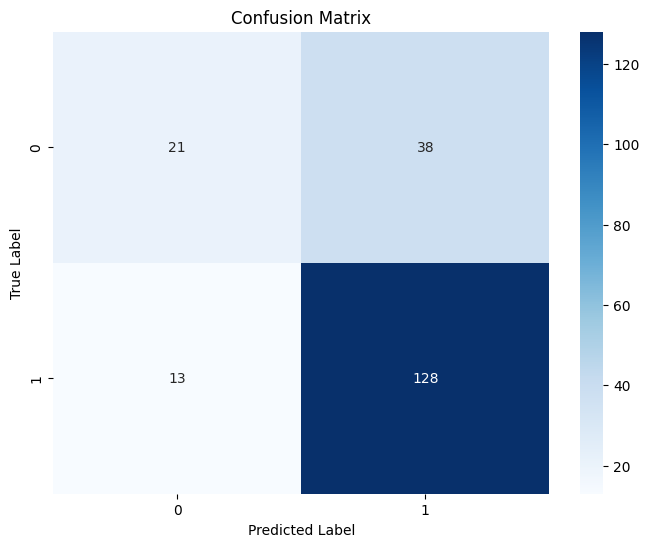

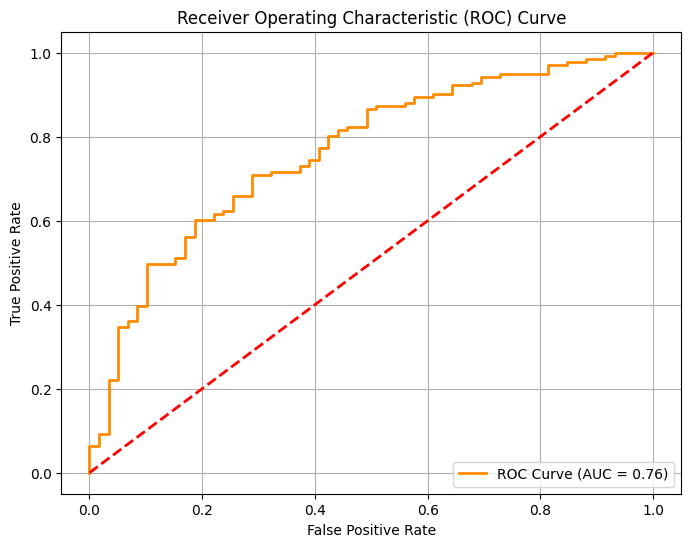

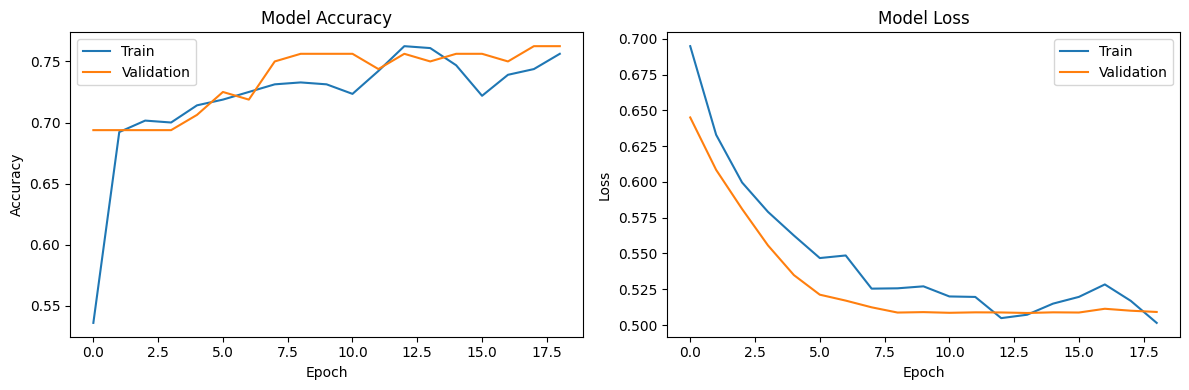

In [20]:
if __name__ == "__main__":
    df = load_and_preprocess_data()
    x = df.drop('Risk', axis=1)
    y = df['Risk']
    model, history, scaler = train_evaluvate_model(x, y)
    plot_training_history(history)
    model.save('german_credit_model.h5')